# Build Model

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


## Network Structure 
Use Keras to build a 5-layer neural network, and each layer has 5 nodes.

In [2]:
def model_factory(n_layers = 5, n_nodes = 5):
    inputs = tf.keras.Input(1)

    outputs = keras.layers.Flatten()(inputs)
    for i in range(n_layers):
        outputs = keras.layers.Dense(n_nodes, activation=keras.layers.LeakyReLU(alpha=0.01))(outputs)
        
    outputs = keras.layers.Dense(1, name = 'output')(outputs)
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    # model.compile(optimizer='adam', loss='mean_absolute_percentage_error', metrics=['mse'])
    model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae', tf.keras.metrics.RootMeanSquaredError(name="rmse", dtype=None)])
    return model

## Regression of x^2+3*x+1

### Generate Data
Generate data from [-10, 10), step is 0.01

In [3]:
X1 = np.arange(-10, 10, 0.01)
def d2(X):
    return X ** 2 + 3 * X + 1
Y1 = d2(X1)

In [4]:
d2_model = model_factory()
d2_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
flatten (Flatten)            (None, 1)                 0         
_________________________________________________________________
dense (Dense)                (None, 5)                 10        
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_4 (Dense)              (None, 5)                 30    

### Fit

In [5]:
history = d2_model.fit(X1, Y1, epochs=2000, batch_size=len(X1), verbose=False)


### Visualize predicted data with raw data

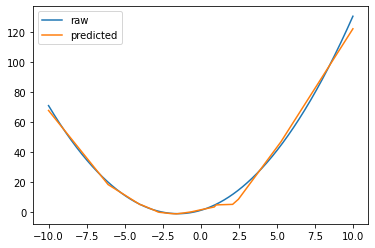

In [6]:
X1_ext = np.arange(-10, 10, 0.01)
plt.plot(X1_ext, d2(X1_ext), label = 'raw')
plt.plot(X1_ext, d2_model.predict(X1_ext), label = 'predicted')
plt.legend()
plt.show()

### Train another model with 10x10 neural network

### Increase the numbers of layers and nodes

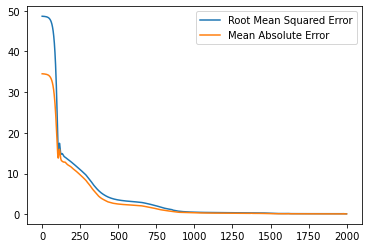

In [7]:
d2_model_10x10 = model_factory(n_layers=10, n_nodes=10)
history = d2_model_10x10.fit(X1, Y1, epochs=2000, batch_size=len(X1), verbose=False)
plt.plot(history.history['rmse'], label='Root Mean Squared Error')
plt.plot(history.history['mae'], label='Mean Absolute Error')
plt.legend()
plt.show()

### Compare

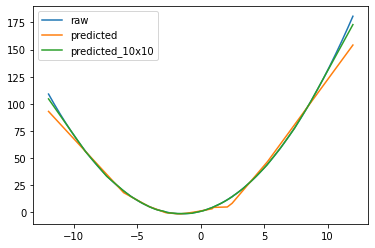

In [8]:
X1_ext = np.arange(-12, 12, 0.01)
plt.plot(X1_ext, d2(X1_ext), label = 'raw')
plt.plot(X1_ext, d2_model.predict(X1_ext), label = 'predicted')
plt.plot(X1_ext, d2_model_10x10.predict(X1_ext), label = 'predicted_10x10')
plt.legend()
plt.show()

We can see, the 10x10 model fits better than the 5x5 one!

## Similarly, we can train with another two functions

## Regression of  (X-9.5)*(X-4)*(X+1)*(X+9.5)

In [9]:
X2 = np.arange(-10, 10, 0.01)
def d4(X):
    return (X-9.5)*(X-4)*(X+1)*(X+9.5)
Y2 = d4(X2)

In [10]:
d4_model = model_factory()
d4_model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1)                 0         
_________________________________________________________________
dense_15 (Dense)             (None, 5)                 10        
_________________________________________________________________
dense_16 (Dense)             (None, 5)                 30        
_________________________________________________________________
dense_17 (Dense)             (None, 5)                 30        
_________________________________________________________________
dense_18 (Dense)             (None, 5)                 30        
_________________________________________________________________
dense_19 (Dense)             (None, 5)                 30  

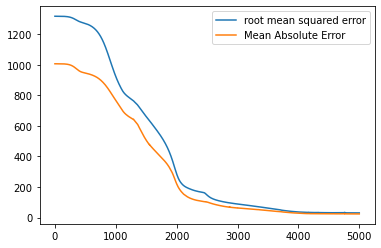

In [11]:
history = d4_model.fit(X2, Y2, epochs=5000, batch_size=len(X2), verbose=False)
plt.plot(history.history['rmse'], label='root mean squared error')
plt.plot(history.history['mae'], label='Mean Absolute Error')
plt.legend()
plt.show()


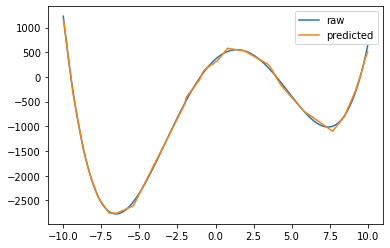

In [12]:
import matplotlib.pyplot as plt
plt.plot(X2, Y2, label = 'raw')
plt.plot(X2, d4_model.predict(X2), label = 'predicted')
plt.legend()

plt.show()

### Increase the numbers of layers and nodes

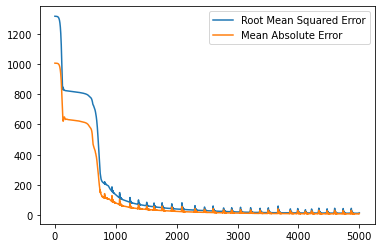

In [13]:
d4_model_10x10 = model_factory(n_layers=10, n_nodes=10)
history = d4_model_10x10.fit(X2, Y2, epochs=5000, batch_size=len(X2), verbose=False)
plt.plot(history.history['rmse'], label='Root Mean Squared Error')
plt.plot(history.history['mae'], label='Mean Absolute Error')
plt.legend()
plt.show()

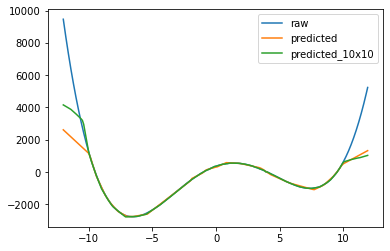

In [14]:
X2_ext = np.arange(-12, 12, 0.1)
plt.plot(X2_ext, d4(X2_ext), label = 'raw')
plt.plot(X2_ext, d4_model.predict(X2_ext), label = 'predicted')
plt.plot(X2_ext, d4_model_10x10.predict(X2_ext), label = 'predicted_10x10')
plt.legend()
plt.show()

## Regression of tanh(x)

In [15]:
X3 = np.arange(-10, 10, 0.01)
Y3 = np.tanh(X3)

In [16]:
tanh_model = model_factory()
tanh_model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 1)                 0         
_________________________________________________________________
dense_30 (Dense)             (None, 5)                 10        
_________________________________________________________________
dense_31 (Dense)             (None, 5)                 30        
_________________________________________________________________
dense_32 (Dense)             (None, 5)                 30        
_________________________________________________________________
dense_33 (Dense)             (None, 5)                 30        
_________________________________________________________________
dense_34 (Dense)             (None, 5)                 30  

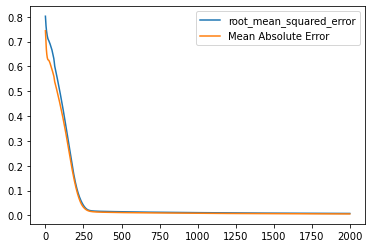

In [17]:
history = tanh_model.fit(X3, Y3, epochs=2000, batch_size=len(X3), verbose=False)
plt.plot(history.history['rmse'], label='root_mean_squared_error')
plt.plot(history.history['mae'], label='Mean Absolute Error')

plt.legend()
plt.show()


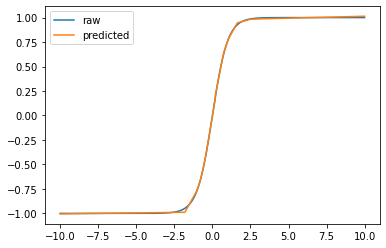

In [18]:
import matplotlib.pyplot as plt
plt.plot(X3, Y3, label = 'raw')
plt.plot(X3, tanh_model.predict(X3), label = 'predicted')
plt.legend()

plt.show()

### Increase the numbers of layers and nodes

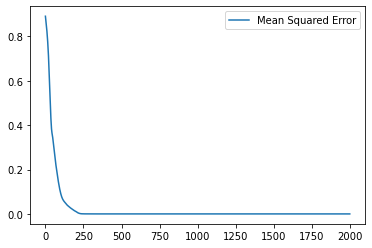

In [19]:
tanh_model_10x10 = model_factory(n_layers=10, n_nodes=10)
history = tanh_model_10x10.fit(X3, Y3, epochs=2000, batch_size=len(X3), verbose=False)
plt.plot(history.history['mse'], label='Mean Squared Error')
plt.legend()
plt.show()

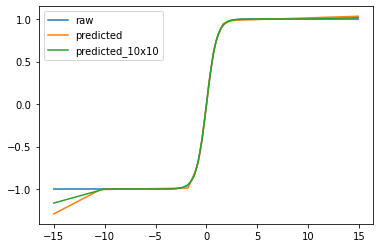

In [20]:
X3_ext = np.arange(-15, 15, 0.1)
plt.plot(X3_ext, np.tanh(X3_ext), label = 'raw')
plt.plot(X3_ext, tanh_model.predict(X3_ext), label = 'predicted')
plt.plot(X3_ext, tanh_model_10x10.predict(X3_ext), label = 'predicted_10x10')
plt.legend()
plt.show()

# Conclusions:

### 1) When using the neural network fitting function, the fitting is only in the training data set (-10, 10), the effect is better, and the fitting becomes significantly worse when the training range is exceeded
### 2) More neurons and layers can make the fitting effect better, but it may also cause overfitting